In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme(style= 'darkgrid') 
import os
import sklearn 
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
os.chdir(r'C:\Users\Shyam Adsul\Python codes SSPU\Data sets')

df = pd.read_csv('titanic.csv')


In [4]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
print(df['Age'].mean())


29.69911764705882


In [7]:
df1 = df.fillna(df['Age'].mean())
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,29.699118,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,29.699118,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,29.699118,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,29.699118,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,29.699118,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [9]:
df1 = df.drop(columns=['Name','PassengerId'],axis = 1)
df1

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,female,19.0,0,0,112053,30.0000,B42,S
888,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,male,26.0,0,0,111369,30.0000,C148,C


In [11]:
df1['Sex'] = df1['Sex'].replace({'male':1,'female':0})
df1.isnull().sum()


Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

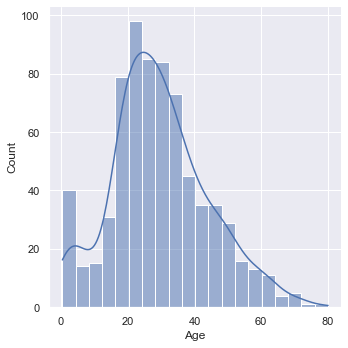

In [19]:
sns.displot(df1['Age'],kde = True)

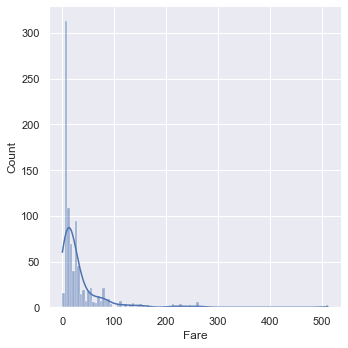

In [20]:
sns.displot(df1['Fare'],kde = True) #most rightly skewed data

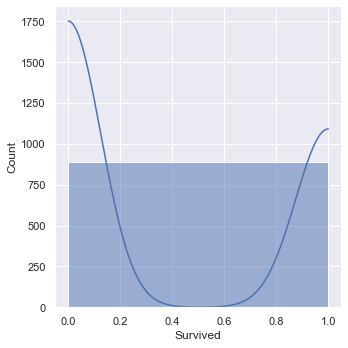

In [21]:
sns.displot(df1['Survived'],kde = True,bins = 1)


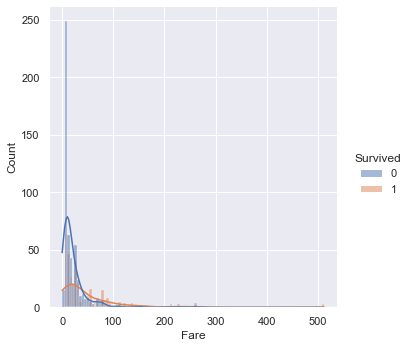

In [22]:
sns.displot(x='Fare',hue='Survived',kde= True,data=df1)

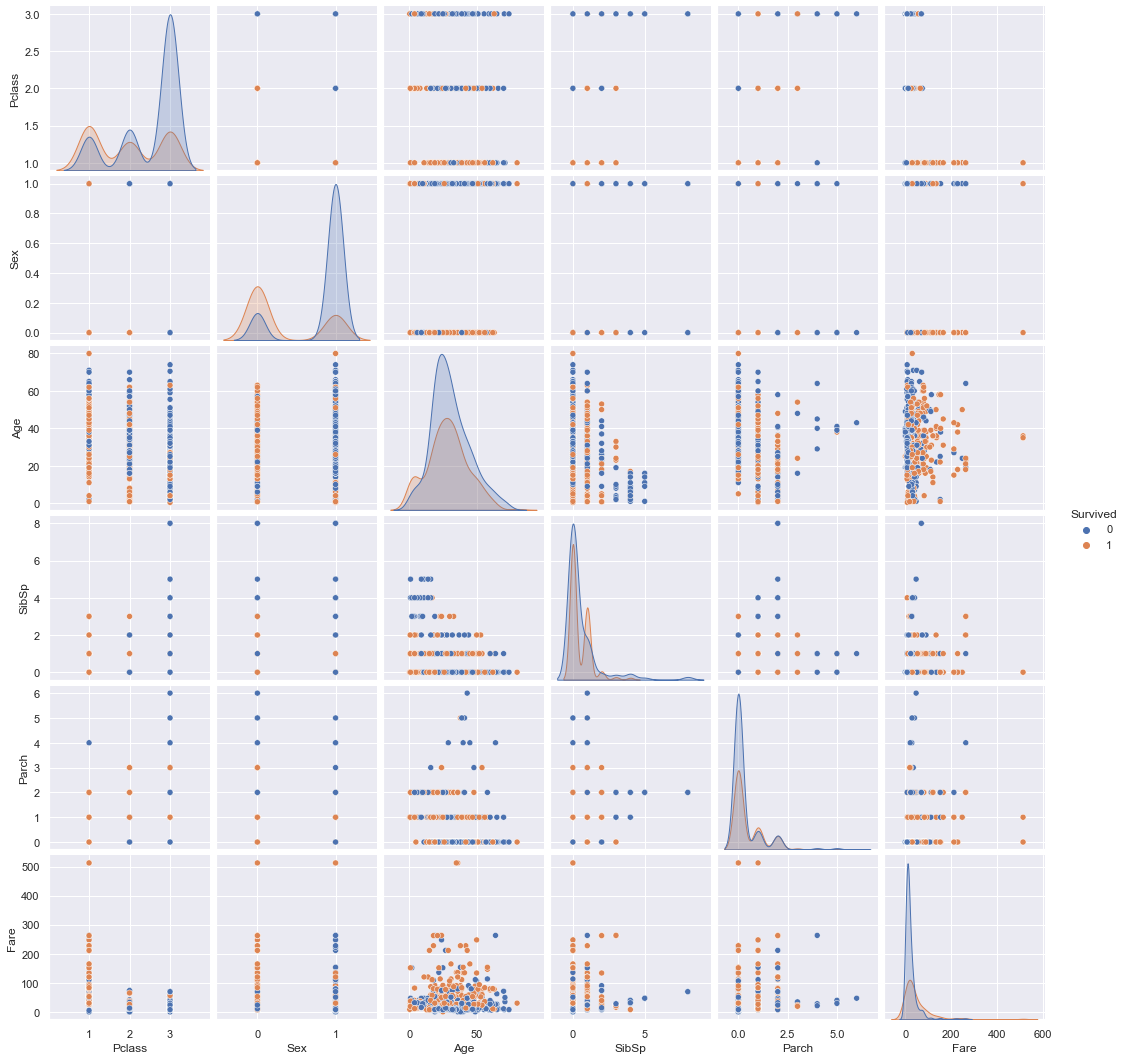

In [18]:
sns.pairplot(data=df1,hue='Survived')

In [17]:
df1.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

# handaling categorical data


In [57]:
obj_df[obj_df.isnull().any(axis=1)]


,Sex,Ticket,Cabin,Embarked
1,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,NaN


In [62]:
obj_df["Sex"].value_counts()

male      95
female    88
Name: Sex, dtype: int64

In [63]:
obj_df["Ticket"].value_counts()


113760      4
19950       4
PC 17572    3
110413      3
110152      3
           ..
112277      1
112059      1
110813      1
111320      1
PC 17610    1
Name: Ticket, Length: 127, dtype: int64

In [64]:
obj_df["Cabin"].value_counts()


C23 C25 C27    4
G6             4
B96 B98        4
F2             3
F33            3
              ..
D30            1
B80            1
E38            1
C111           1
B39            1
Name: Cabin, Length: 133, dtype: int64

In [65]:
obj_df["Embarked"].value_counts()


S    116
C     65
Q      2
Name: Embarked, dtype: int64

In [73]:
obj_df = obj_df.fillna(df1['Sex']).mean(df1['Sex'])
obj_df

AttributeError: 'float' object has no attribute 'fillna'

In [61]:
Scaling = StandardScaler()

In [72]:
Scaling.fit_transform(df1[['PassengerId','Survived','Pclass','Age','Parch','Fare']])
df4_scaled = pd.DataFrame(df1[['PassengerId','Survived','Pclass','Age','Parch','Fare']])
df4_scaled
df4_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   Parch        891 non-null    int64  
 5   Fare         891 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 41.9 KB


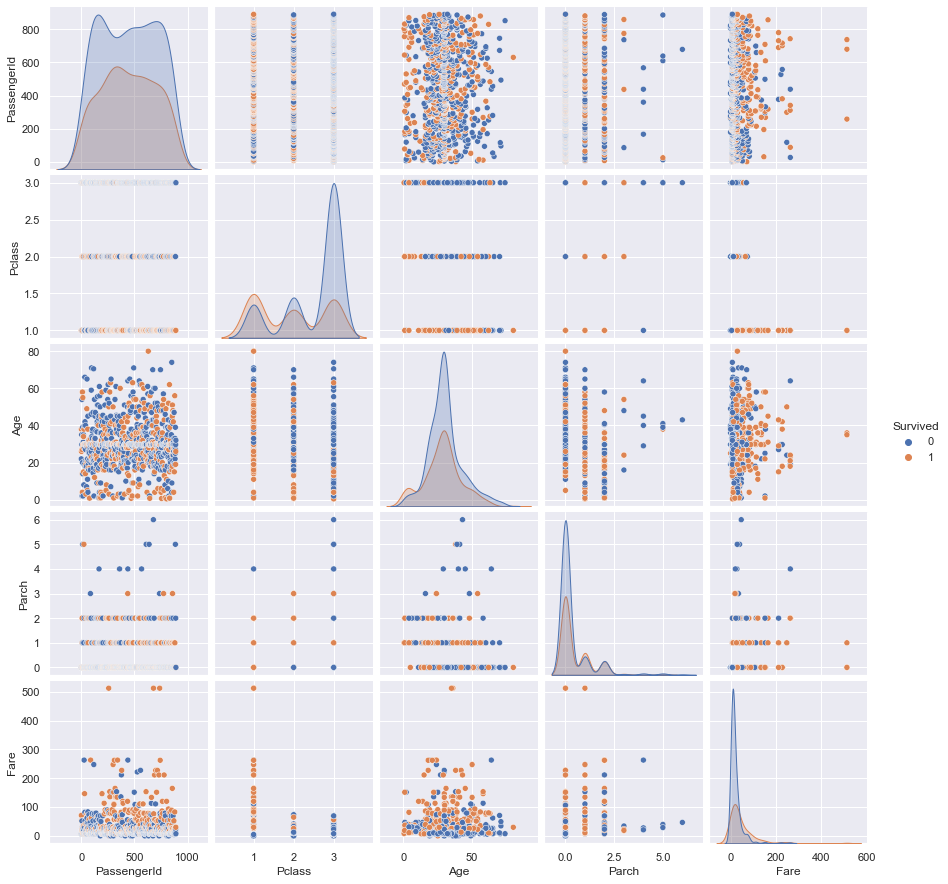

In [64]:
sns.pairplot(df4_scaled,hue='Survived')

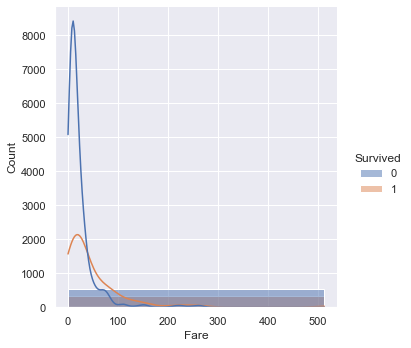

In [74]:
sns.displot(x='Fare',hue='Survived',kde= True,data=df4_scaled,bins = 1)

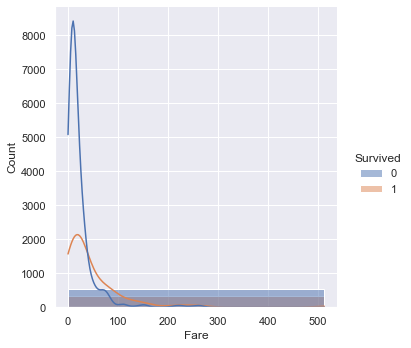

In [67]:
sns.displot(x='Fare',hue='Survived',kde= True,data=df,bins = 1)

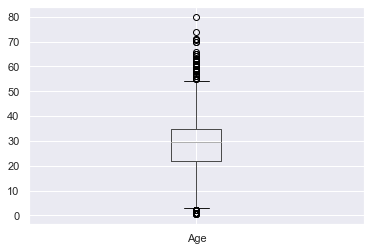

In [70]:
figure=df.boxplot(column="Age")

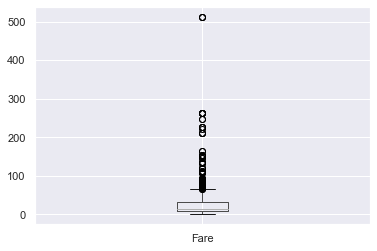

In [71]:
figure=df.boxplot(column="Fare")

In [73]:
sns.pairplot(df4_scaledf)

NameError: name 'df4_scaledf' is not defined